# Optimization pipeline

## QUBO Marix

We have a square matrix W

In [34]:
import numpy as np
W = [[153, 510, 706, 966, 581, 455, 70 , 160, 372, 157, 567, 342, 398],
    [0  , 664, 997, 598, 507, 197, 311, 479, 310, 581, 417, 376, 275],
    [0  , 0  , 28 , 744, 390, 437, 491, 645, 880, 618, 374, 455, 211],  
    [0  , 0  , 0  , 491, 265, 410, 664, 804, 1070,768, 259, 499, 310],
    [0  , 0  , 0  , 0  , 400, 514, 902, 990, 1261,947, 418, 635, 636], 
    [0  , 0  , 0  ,0   , 0  , 168, 522, 634, 910, 593, 19 , 284, 239], 
    [0  , 0  , 0  , 0  ,0  , 0   , 232, 124, 163, 439, 757, 389, 123],
    [0  , 0  , 0  , 0  ,0  , 0   , 0  , 154, 406, 133, 508, 273, 355], 
    [0  , 0  , 0  , 0  ,0  , 0   , 0  , 0  , 276, 43 , 623, 358, 498],
    [0  , 0  , 0  , 0  ,0  , 0   , 0  , 0  , 0  , 318, 898, 633, 761], 
    [0  , 0  , 0  , 0  ,0  , 0   , 0  , 0  , 0  , 0  , 582, 315, 464], 
    [0  , 0  , 0  , 0  ,0  , 0   , 0  , 0  , 0  , 0  , 0  , 275, 221], 
    [0  , 0  , 0  , 0  , 0 , 0   , 0  , 0  , 0  , 0  , 0  , 0  , 247]]   


We need to find such a vector <v| = [V1,V2,...,Vn], where n is the number of columns, of the square matrix W, which
c = <v|W|v> has a minimum value. 

## Сalculation qubo sum

This function should be minimal for the optimal solution

In [118]:
def calc_qubo_value(M, v):
    quboSum = 0
    for i in range(0,len(v)):
        for j in range(0, len(v)):
            quboSum += v[i]*M[i][j]*v[j]
    return quboSum


## Make random vector

A helper function to create an initial random condition and compare the optimal value with a random solution

In [36]:
import random
def make_random_vector(nsize):
    v = [];
    for x in range(0, nsize):
        v.append(random.random())
    return v    
    

Creating a random vector

In [37]:
vct = make_random_vector(len(W[0]))
print(vct)

[0.2479867345564598, 0.721369652454255, 0.9561687237997859, 0.34331435526189835, 0.5569300018928304, 0.5863439784833088, 0.6926191188027525, 0.6641929628097331, 0.04018661203726415, 0.6837627993058603, 0.5617769170322446, 0.1189749297075049, 0.6789212822160954]


Checking the calculation of the objective function on a random vector

In [38]:
qubo = calc_qubo_value(W, make_random_vector(len(W[0])))
print('qubo sum:' + str(qubo)) 

qubo sum:9248.153785155506


## Randomize weight matrix 

Random mixing of the weight matrix of the problem.

Needed for accidentally reducing the size of a problem or accidentally splitting a task into parts

Function of random shuffling of vector indices

In [39]:
#rng = np.random.default_rng()
def random_index(nsize, vindex = []):
    if len(vindex) == nsize:
        return vindex
    index = random.randint(0,nsize-1)
#    index = rng.integers(0,nsize-1)
    for i in range(0,len(vindex)):
        if vindex[i] == index: 
            return random_index(nsize, vindex)
    vindex.append(index)
    return random_index(nsize, vindex)
    

Checking for random mixing of indices

In [40]:
print(random_index(10))

[0, 3, 6, 9, 4, 5, 8, 2, 1, 7]


Weight matrix shuffle function by shuffle vector

In [41]:
def randomize_matrix(M, rv):
    newM = [([0]*len(M[0])) for i in range(len(M[0]))]
    for i in range(0, len(rv)):
        for j in range(0, len(rv)):
            if i > j:
                newM[i][j] = 0
            else:
                if rv[i] <= rv[j]:
                    newM[i][j] = M[rv[i]][rv[j]]
                else:
                    newM[i][j] = M[rv[j]][rv[i]]
    return newM

Checking the Random Mixing Functions of the Weight Matrix

In [42]:

rv = random_index(len(W[0]))
print(rv)
newW = randomize_matrix(W, rv)


[0, 3, 6, 9, 4, 5, 8, 2, 1, 7, 11, 10, 12]


## Matrix split

Dividing a square matrix into two parts. It is necessary to reduce the dimension of the problem.

In [43]:
def split_matrix(M, size):
    M1 = []
    M2 = []
    if len(M) < size:
        return []
    for i in range(0, size):
        M1.append([])
        for j in range(0, size):
            M1[i].append(M[i][j])
    for i in range(size, len(M)):
        M2.append([])
        for j in range(size, len(M)):
            M2[i-size].append(M[i][j])
            
    return [M1, M2]


Checking the division of the matrix into parts

In [44]:
listM = split_matrix(W, 7)
print(listM)


[[[153, 510, 706, 966, 581, 455, 70], [0, 664, 997, 598, 507, 197, 311], [0, 0, 289, 744, 390, 437, 491], [0, 0, 0, 491, 265, 410, 664], [0, 0, 0, 0, 400, 514, 902], [0, 0, 0, 0, 0, 168, 522], [0, 0, 0, 0, 0, 0, 232]], [[154, 406, 133, 508, 273, 355], [0, 276, 43, 623, 358, 498], [0, 0, 318, 898, 633, 761], [0, 0, 0, 582, 315, 464], [0, 0, 0, 0, 275, 221], [0, 0, 0, 0, 0, 247]]]


## Creating a Problem Graph

Create a vertex vector for a graph

In [47]:
def create_vector_nodes(size):
    v = [i for i in range(size)]
    return v

Checking the generated vertex vector for the graph

In [48]:
print(create_vector_nodes(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


create edges from weight marix

In [51]:
def create_edges(M):
    edges = []
    for i in range(0, len(M)):
        for j in range (i + 1, len(M)):
            if M[i][j] != 0:
                edges.append((i,j))
    return edges        
                
            

Checking the Created Graph edges

In [52]:
print(create_edges(W))

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (7, 8), (7, 9), (7, 10), (7, 11), (7, 12), (8, 9), (8, 10), (8, 11), (8, 12), (9, 10), (9, 11), (9, 12), (10, 11), (10, 12), (11, 12)]


Creating a color map for graph visualization

In [53]:
def create_color_map(size):
    v = ['red' for i in range(size)]
    return v

## Build graph on weight matrix

In [55]:
import networkx as nx
import matplotlib.pyplot as plt
def create_graph(M):
    g = nx.Graph()
    
    g.add_nodes_from(create_vector_nodes(len(M)))
    g.add_edges_from(create_edges(M))
    return g


Drawing the constructed graph

In [65]:
def draw_graph(g):
    color_map = create_color_map(len(g.nodes))
    nx.draw(g, node_color=color_map, with_labels=True, alpha=0.8, node_size=500)
  

Checking the construction of a graph by the matrix of the problem and its drawing

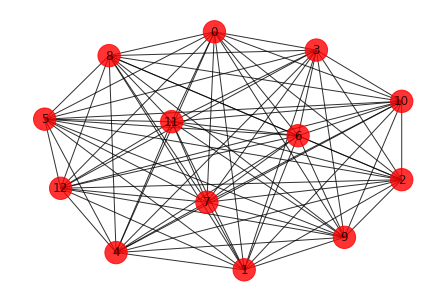

In [66]:
g = create_graph(W)
draw_graph(g)


Checking the division of the task into parts, building graphs of parts and drawing them

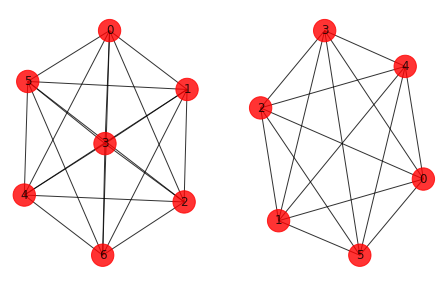

In [77]:
listW = split_matrix(W, 7)
fig, axes = plt.subplots(nrows=1, ncols=len(listW),figsize=(12,5))
for i in range(0, len(listW)):
    plt.subplot(1, 3, i+1)
    draw_graph(create_graph(listW[i]))
   

## Classical minimizer

Search for the minimum solution of the problem by classical methods.

Reducing the parameters of the objective function so that it depends only on the desired vector

In [122]:
w = W
def calc_value_g(v):
    return calc_qubo_value(w, v)


Applications of the nelder-mead mimic method

In [125]:
from scipy.optimize import minimize 
v0 = make_random_vector(len(w[0]))
#result = minimize(calc_value_g, v0, method="nelder-mead", options={'maxiter':10000})
#print(result)

The method does not find the optimal solution for the given matrix. Returns when the maximum number of iterations of the method is completed.

## QAOA Optimization

### Create QUBO docplex model

In [116]:
from docplex.mp.model import Model
from qiskit_optimization.translators import from_docplex_mp


def create_qubo_problem(M):
    n = len(M);
    # Formulate the problem as a Docplex model
    model = Model()
    
    # Create n binary variables
    x = model.binary_var_list(n)

    # Define the objective function to be minimized
    model.minimize(calc_qubo_value(M, x))
    
    # Fix node 0 to be 1 to break the symmetry of the max-cut solution
    model.add(x[0] == 1)
    
    # Convert the Docplex model into a `QuadraticProgram` object
    problem = from_docplex_mp(model)
    return problem


Checking the problem statement

In [117]:
problem = create_qubo_problem(W)
print(problem)

minimize 153*x0^2 + 510*x0*x1 + 567*x0*x10 + 342*x0*x11 + 398*x0*x12 + 706*x0*x2 + 966*x0*x3 + 581*x0*x4 + 455*x0*x5 + 70*x0*x6 + 160*x0*x7 + 372*x0*x8 + 157*x0*x9 + 664*x1^2 + 417*x1*x10 + 376*x1*x11 + 275*x1*x12 + 997*x1*x2 + 598*x1*x3 + 507*x1*x4 + 197*x1*x5 + 311*x1*x6 + 479*x1*x7 + 310*x1*x8 + 581*x1*x9 + 582*x10^2 + 315*x10*x11 + 464*x10*x12 + 275*x11^2 + 221*x11*x12 + 247*x12^2 + 374*x2*x10 + 455*x2*x11 + 211*x2*x12 + 289*x2^2 + 744*x2*x3 + 390*x2*x4 + 437*x2*x5 + 491*x2*x6 + 645*x2*x7 + 880*x2*x8 + 618*x2*x9 + 259*x3*x10 + 499*x3*x11 + 310*x3*x12 + 491*x3^2 + 265*x3*x4 + 410*x3*x5 + 664*x3*x6 + 804*x3*x7 + 1070*x3*x8 + 768*x3*x9 + 418*x4*x10 + 635*x4*x11 + 636*x4*x12 + 400*x4^2 + 514*x4*x5 + 902*x4*x6 + 990*x4*x7 + 1261*x4*x8 + 947*x4*x9 + 19*x5*x10 + 284*x5*x11 + 239*x5*x12 + 168*x5^2 + 522*x5*x6 + 634*x5*x7 + 910*x5*x8 + 593*x5*x9 + 757*x6*x10 + 389*x6*x11 + 123*x6*x12 + 232*x6^2 + 124*x6*x7 + 163*x6*x8 + 439*x6*x9 + 508*x7*x10 + 273*x7*x11 + 355*x7*x12 + 154*x7^2 + 406*x7*x8

### Algoritm result

Problem solving result class. Needed to convert results to different types

In [229]:
class OptimizationResult:
    def __init__(self, result):
        self.result = result
    def x_to_str(self, x):
        strX = ''
        for i in range(0, len(x)):
            strX += str(x[i])
        return strX
    def get_probability_solution(self):
        probability_solution = {}
        for i in range(0, len(self.result.raw_samples)):
            probability_solution.update({self.x_to_str(self.result.raw_samples[i].x):self.result.raw_samples[i].probability})
        return probability_solution    
    def get_value_solution(self):
        value_solution = {}
        for i in range(0, len(self.result.raw_samples)):
            value_solution.update({self.x_to_str(self.result.raw_samples[i].x):self.result.raw_samples[i].fval})
        return value_solution    
        
    def get_solutions(self):
        rows = []
        for i in range(0, len(self.result.raw_samples)):
            rows.append(self.result.raw_samples[i].x)
        return rows
    
        


### Create algoritm QAOA

In [162]:
from qiskit.utils import algorithm_globals, QuantumInstance
from qiskit import BasicAer
from qiskit.algorithms import QAOA
from qiskit.algorithms.optimizers import SPSA
from qiskit.circuit.library.n_local.qaoa_ansatz import QAOAAnsatz


class AlgoritmQAOA:
    #constructor
    def __init__(self, problem, reps=None, optimizer=None, q_i=None):
        seed = 1234
        algorithm_globals.random_seed = seed
        if q_i == None:
            backend = BasicAer.get_backend('qasm_simulator') 
            q_i = QuantumInstance(backend=backend, seed_simulator=seed, seed_transpiler=seed)
        if optimizer == None:
            optimizer = SPSA(maxiter=250)
        if reps == None:
            reps = 1
        self.reps = reps    
        self.problem = problem
        self.q_i = q_i
        self.change_optimizer(optimizer)
        self.initial_state = QuantumCircuit(len(problem.variables))
    #Rebuilding qaoa and circuit
    def set_qaoa(self):
        self.qaoa = QAOA(optimizer=self.optimizer, reps=self.reps, quantum_instance=self.q_i)
        self.algorithm = MinimumEigenOptimizer(self.qaoa)
        problem_ = self.algorithm._convert(problem, self.algorithm._converters)
        operator, offset = problem_.to_ising()
        self.ansatz = QAOAAnsatz(cost_operator=operator, reps=self.reps,  name = 'QAOA')
       

    #change classical optimizer for beta and gamma    
    def change_optimizer(self, optimizer):
        self.optimizer = optimizer
        self.set_qaoa()
    #set parametr p for QAOA
    def set_reps(self, reps = None):
        if reps != None:
            self.reps = reps
        self.set_qaoa()
    #get circuit QAOA
    def get_circuit(self, reps = None):
        sv_reps = self.reps;
        self.set_reps(reps)
        qc = self.ansatz
        self.set_reps(sv_reps)
        return qc
    #solve problem     
    def solve(self, reps = None):
        sv_reps = self.reps;
        self.set_reps(reps)
        self.result = self.algorithm.solve(self.problem)
        self.set_reps(sv_reps)
        return self.result

        


### Checking the operation of the QAOA algorithm

Rendering cicuit with depth 1

13


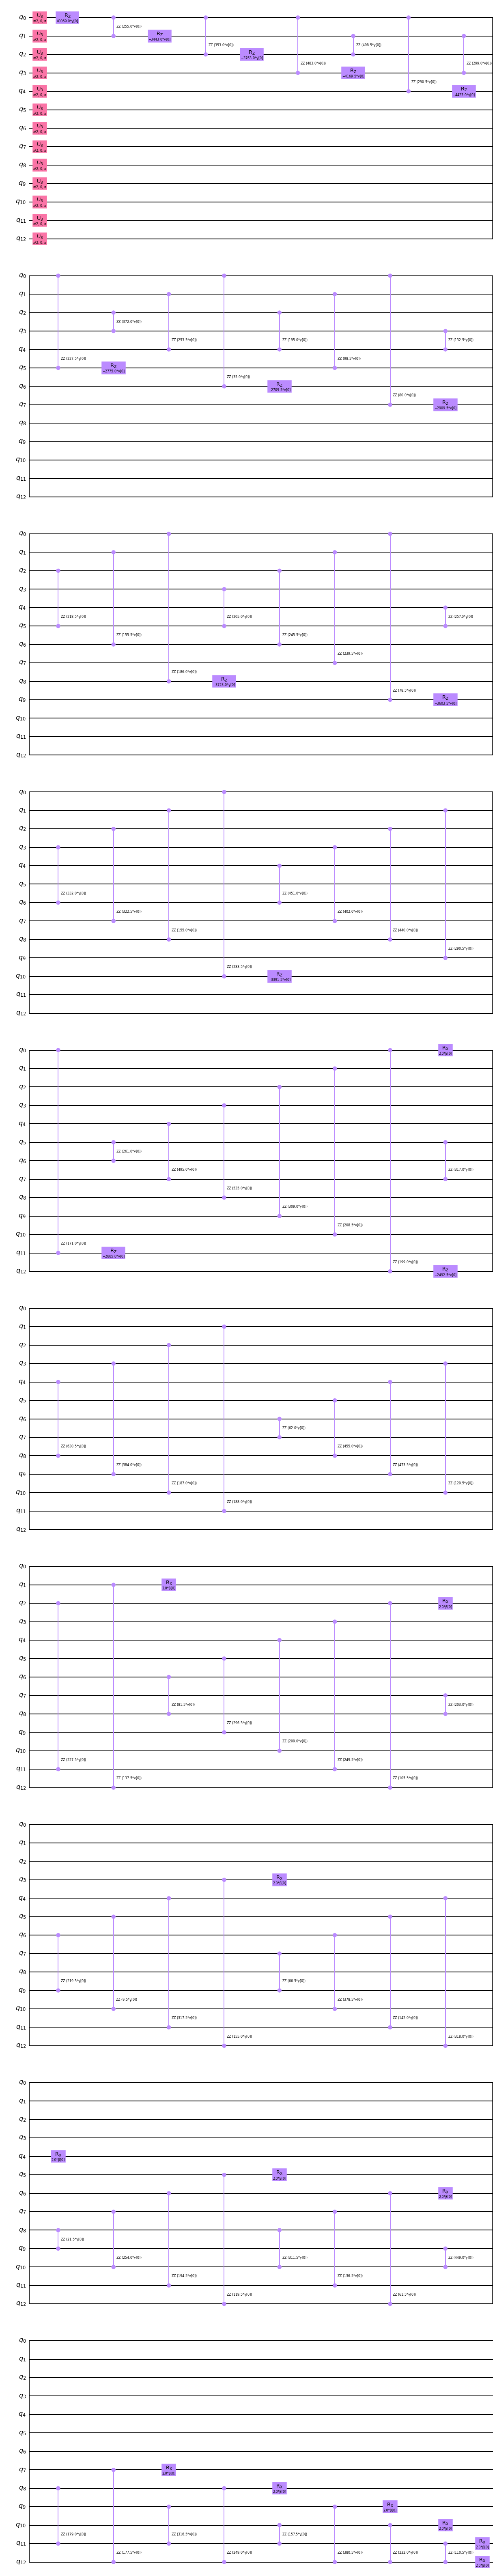

In [168]:
alg = AlgoritmQAOA(create_qubo_problem(W))
qc = alg.get_circuit()
print(qc.num_qubits)
#print(alg.qaoa.initial_state)
#print(qc)

qc.decompose().decompose().decompose().draw("mpl")



Get circuit in basis gates IBMQ

In [139]:
from qiskit import transpile
from qiskit.providers.aer import AerSimulator
from qiskit.providers.aer.noise import NoiseModel, amplitude_damping_error
from qiskit.providers.models.backendconfiguration import QasmBackendConfiguration

def get_IBMQ_noise(qc):
    noise_model = NoiseModel()
    noise_model.add_basis_gates(['id', 'rz', 'sx', 'x', 'cx'])
    sim_noise = AerSimulator(noise_model=noise_model)

    qc_noise = transpile(qc, sim_noise)
    return qc_noise


Draw circuit in basis gates IBMQ

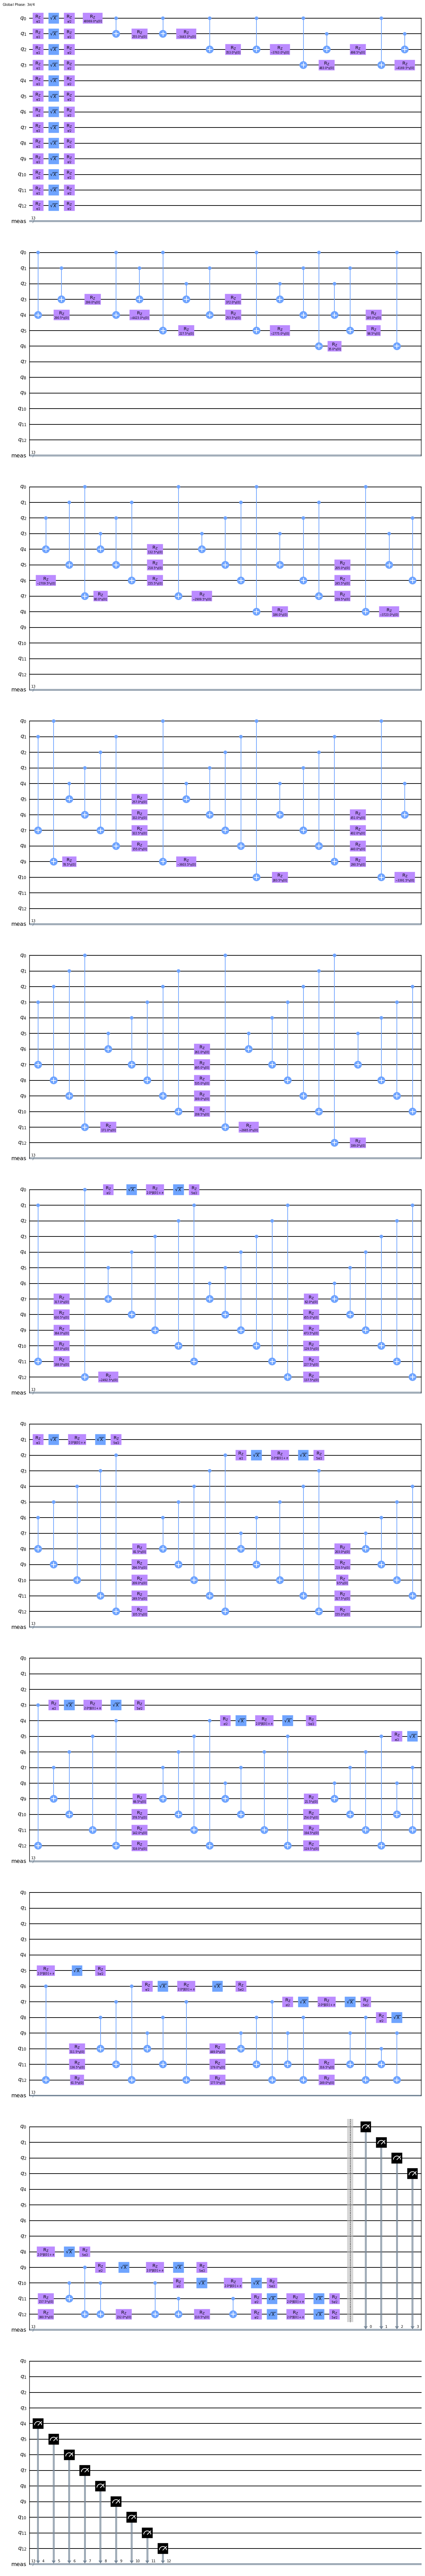

In [169]:
    qc.measure_all()
    qcIBM = get_IBMQ_noise(qc)
    qcIBM.draw("mpl")

### Reduce the size of the problem to 4 and solve it

In [177]:
listW = split_matrix(W, 4)
W4 = listW[0]
print(len(W4))


4


In [178]:
problem = create_qubo_problem(W4)
print(problem)
alg = AlgoritmQAOA(problem)
qc = alg.get_circuit()
print(qc.num_qubits)



minimize 153*x0^2 + 510*x0*x1 + 706*x0*x2 + 966*x0*x3 + 664*x1^2 + 997*x1*x2 + 598*x1*x3 + 289*x2^2 + 744*x2*x3 + 491*x3^2 (4 variables, 1 constraints, 'docplex_model21')
4


In [179]:
result = alg.solve()

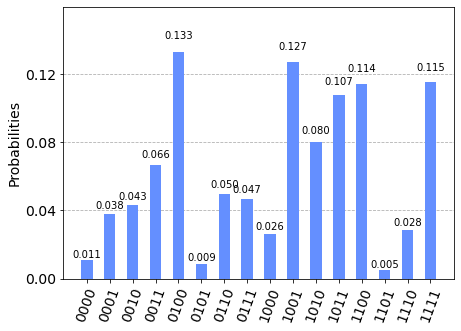

In [228]:
from qiskit.visualization import plot_histogram
result = OptimizationResult(alg.result)
r = result.get_probability_solution()
plot_histogram(r)
